In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart_2020_cleaned.csv')
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# EDA

## 1. Shape of the data set

In [3]:
data.shape

(319795, 18)

## 2. Data types

In [4]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

## 3. Check for null enteries

In [5]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## 4. Check for duplicates

In [6]:
data[data.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


Since we have duplicate observations we need to drop them.

In [7]:
data = data.drop_duplicates()
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [8]:
data.to_csv('Heart_Disease_data_with_outliers.csv')

## 5. Summary of data 

In [9]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [10]:
data.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,274456,174312,280136,289653,257362,159671,31670,227724,251796,230412,104796,259066,289941,272425


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [12]:
data.max()

HeartDisease                           Yes
BMI                                  94.85
Smoking                                Yes
AlcoholDrinking                        Yes
Stroke                                 Yes
PhysicalHealth                          30
MentalHealth                            30
DiffWalking                            Yes
Sex                                   Male
AgeCategory                    80 or older
Race                                 White
Diabetic            Yes (during pregnancy)
PhysicalActivity                       Yes
GenHealth                        Very good
SleepTime                               24
Asthma                                 Yes
KidneyDisease                          Yes
SkinCancer                             Yes
dtype: object

## 6. About the features

We have total 18 features in that one is dependent variable 'Heart Disease' that is out output and other 17 are input features

In [13]:
columns = data.columns
columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

### For Smoking

In [14]:
pd.value_counts(data['Smoking'])

No     174312
Yes    127405
Name: Smoking, dtype: int64

In [15]:
pd.crosstab(data['Smoking'],data['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
Smoking,,,
No,163028,11284,174312
Yes,111428,15977,127405
All,274456,27261,301717


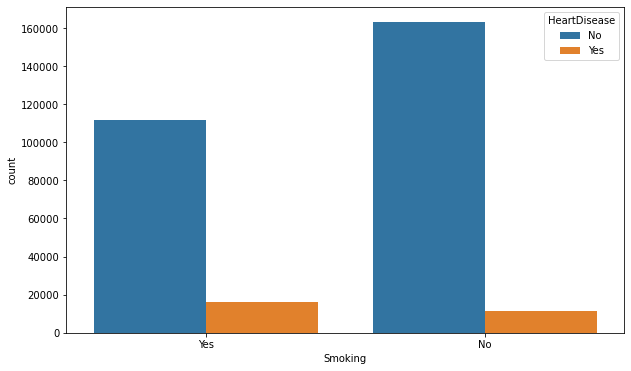

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='Smoking',hue='HeartDisease',data=data,order=['Yes','No'])
plt.show()

### For AlcoholDrinking

In [17]:
pd.value_counts(data['AlcoholDrinking'])

No     280136
Yes     21581
Name: AlcoholDrinking, dtype: int64

In [18]:
pd.crosstab(data['AlcoholDrinking'],data['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
AlcoholDrinking,,,
No,254016,26120,280136
Yes,20440,1141,21581
All,274456,27261,301717


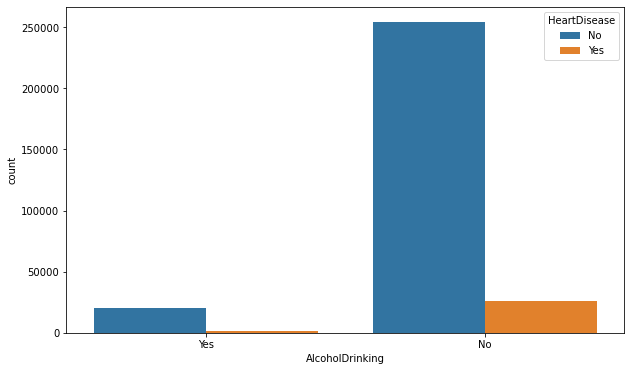

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='AlcoholDrinking',hue='HeartDisease',data=data,order=['Yes','No'])
plt.show()

###  For Stroke

In [20]:
pd.value_counts(data['Stroke'])

No     289653
Yes     12064
Name: Stroke, dtype: int64

In [21]:
pd.crosstab(data['Stroke'],data['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
Stroke,,,
No,266781,22872,289653
Yes,7675,4389,12064
All,274456,27261,301717


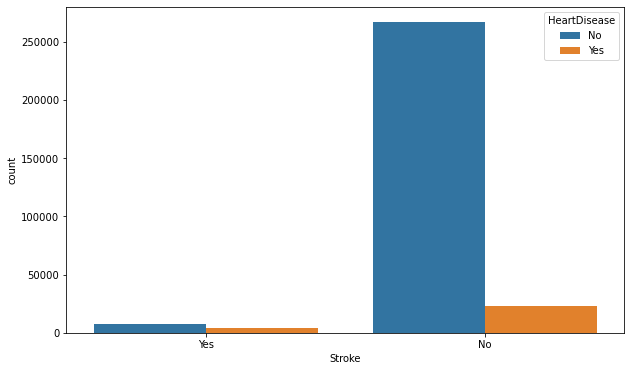

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='Stroke',hue='HeartDisease',data=data,order=['Yes','No'])
plt.show()

### For DiffWalking

In [23]:
pd.value_counts(data['DiffWalking'])

No     257362
Yes     44355
Name: DiffWalking, dtype: int64

In [24]:
pd.crosstab(data['DiffWalking'],data['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
DiffWalking,,,
No,240125,17237,257362
Yes,34331,10024,44355
All,274456,27261,301717


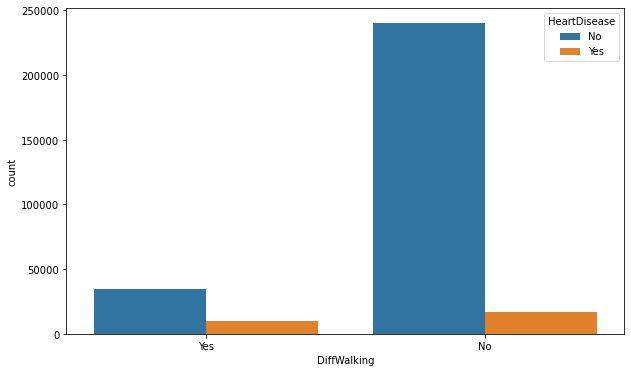

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='DiffWalking',hue='HeartDisease',data=data,order=['Yes','No'])
plt.show()

###  For Sex

In [26]:
pd.value_counts(data['Sex'])

Female    159671
Male      142046
Name: Sex, dtype: int64

In [27]:
pd.crosstab(data['Sex'],data['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
Sex,,,
Female,148458,11213,159671
Male,125998,16048,142046
All,274456,27261,301717


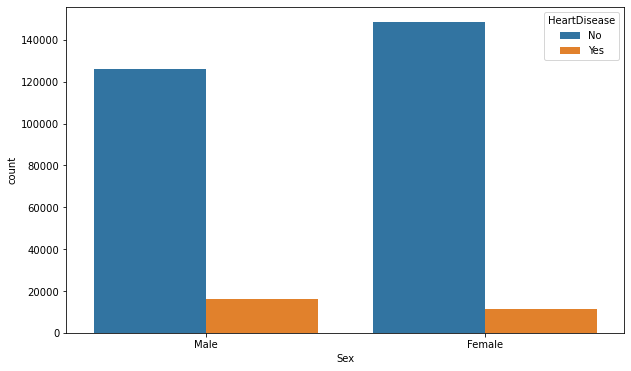

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='Sex',hue='HeartDisease',data=data,order=['Male','Female'])
plt.show()

### For AgeCategory

In [29]:
pd.value_counts(data['AgeCategory'],ascending=True)

25-29          16312
30-34          17953
35-39          19526
40-44          19837
18-24          19998
45-49          20518
75-79          20713
80 or older    23352
50-54          23736
55-59          27610
70-74          29273
60-64          31219
65-69          31670
Name: AgeCategory, dtype: int64

In [30]:
pd.crosstab(data['AgeCategory'],data['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
AgeCategory,,,
18-24,19868,130,19998
25-29,16179,133,16312
30-34,17727,226,17953
35-39,19230,296,19526
40-44,19351,486,19837
45-49,19775,743,20518
50-54,22353,1383,23736
55-59,25411,2199,27610
60-64,27898,3321,31219


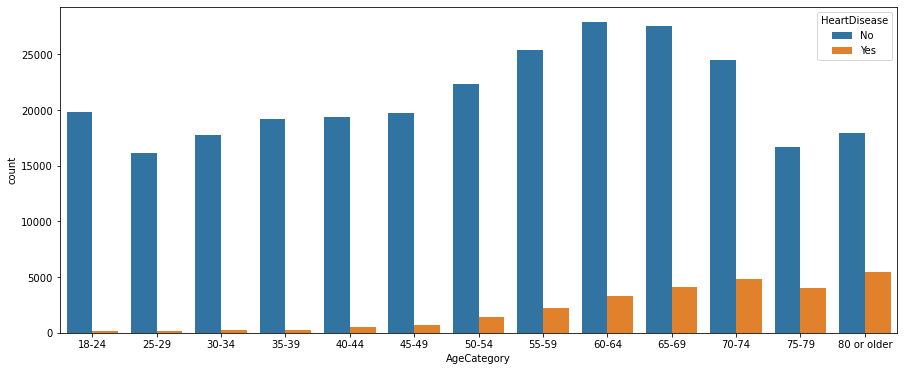

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(x='AgeCategory',hue='HeartDisease',data=data,order=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'])
plt.show()

### For Race

In [32]:
pd.value_counts(data['Race'])

White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
Name: Race, dtype: int64

In [33]:
pd.crosstab(data['Race'],data['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
Race,,,
American Indian/Alaskan Native,4650,542,5192
Asian,7727,266,7993
Black,21081,1729,22810
Hispanic,25664,1443,27107
Other,10005,886,10891
White,205329,22395,227724
All,274456,27261,301717


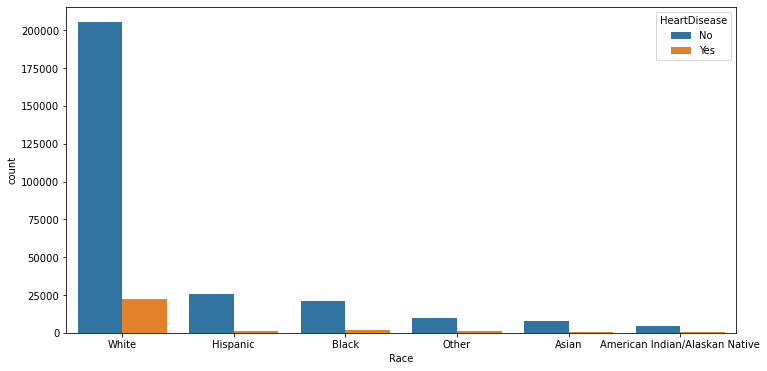

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x='Race',hue='HeartDisease',data=data,order=['White','Hispanic','Black','Other','Asian','American Indian/Alaskan Native'])
plt.show()

### For Diabetic

In [35]:
pd.value_counts(data['Diabetic'])

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [36]:
pd.crosstab(data['Diabetic'],data['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
Diabetic,,,
No,234380,17416,251796
"No, borderline diabetes",5987,789,6776
Yes,31641,8948,40589
Yes (during pregnancy),2448,108,2556
All,274456,27261,301717


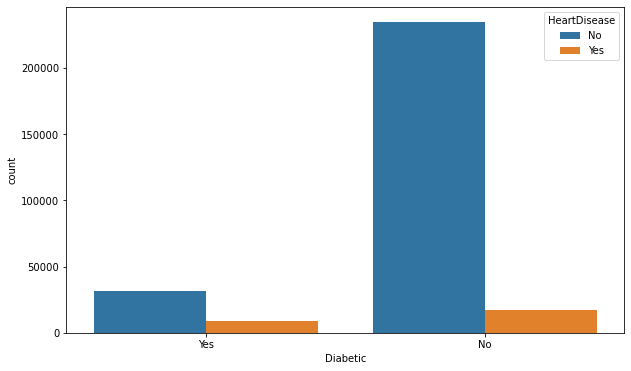

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='Diabetic',hue='HeartDisease',data=data,order=['Yes','No'])
plt.show()

### For PhysicalActivity

In [38]:
pd.value_counts(data['PhysicalActivity'])

Yes    230412
No      71305
Name: PhysicalActivity, dtype: int64

In [39]:
pd.crosstab(data['PhysicalActivity'],data['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
PhysicalActivity,,,
No,61423,9882,71305
Yes,213033,17379,230412
All,274456,27261,301717


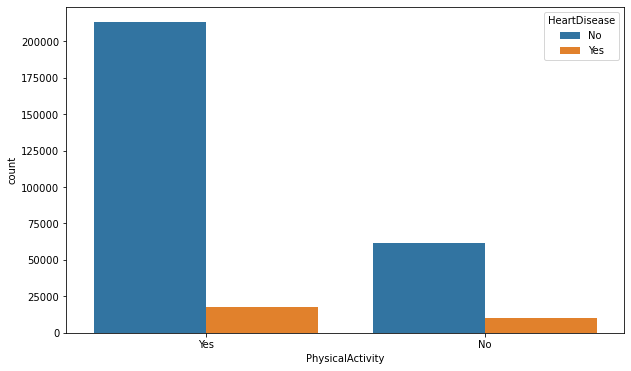

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='PhysicalActivity',hue='HeartDisease',data=data,order=['Yes','No'])
plt.show()

### For GenHealth

In [41]:
pd.value_counts(data['GenHealth'])

Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286
Name: GenHealth, dtype: int64

In [42]:
pd.crosstab(data['GenHealth'],data['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
GenHealth,,,
Excellent,58242,1495,59737
Fair,27576,7083,34659
Good,81734,9505,91239
Poor,7436,3850,11286
Very good,99468,5328,104796
All,274456,27261,301717


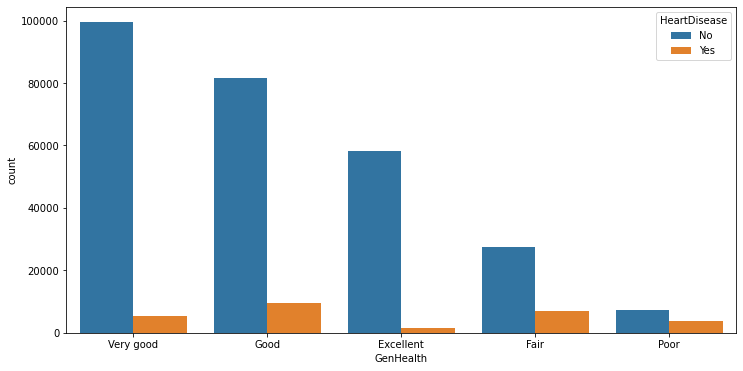

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x='GenHealth',hue='HeartDisease',data=data,order=['Very good','Good','Excellent','Fair','Poor'])
plt.show()

### For Asthma

In [44]:
pd.value_counts(data['Asthma'])

No     259066
Yes     42651
Name: Asthma, dtype: int64

In [45]:
pd.crosstab(data['Asthma'],data['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
Asthma,,,
No,236737,22329,259066
Yes,37719,4932,42651
All,274456,27261,301717


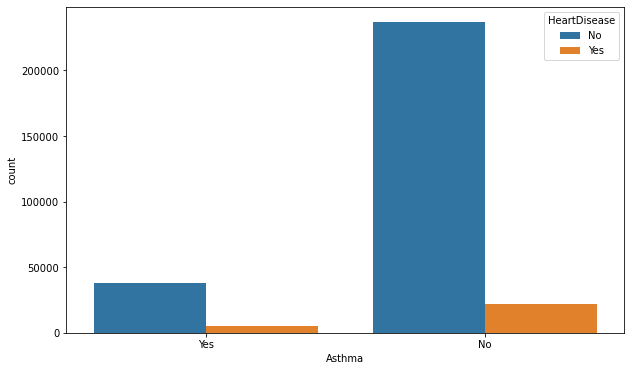

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x='Asthma',hue='HeartDisease',data=data,order=['Yes','No'])
plt.show()

### For KidneyDisease

In [47]:
pd.value_counts(data['KidneyDisease'])

No     289941
Yes     11776
Name: KidneyDisease, dtype: int64

In [48]:
pd.crosstab(data['KidneyDisease'],data['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
KidneyDisease,,,
No,266134,23807,289941
Yes,8322,3454,11776
All,274456,27261,301717


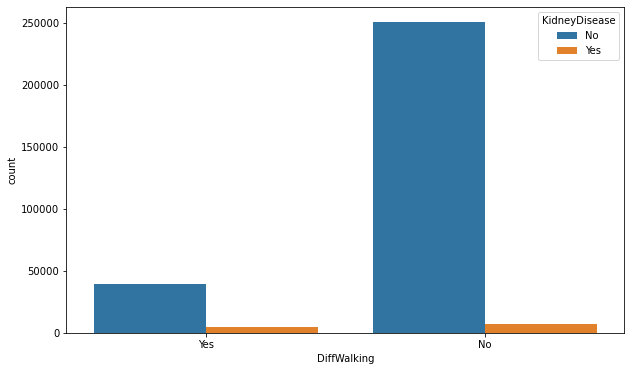

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(x='DiffWalking',hue='KidneyDisease',data=data,order=['Yes','No'])
plt.show()

### For SkinCancer

In [50]:
pd.value_counts(data['SkinCancer'])

No     272425
Yes     29292
Name: SkinCancer, dtype: int64

In [51]:
pd.crosstab(data['SkinCancer'],data['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
SkinCancer,,,
No,250132,22293,272425
Yes,24324,4968,29292
All,274456,27261,301717


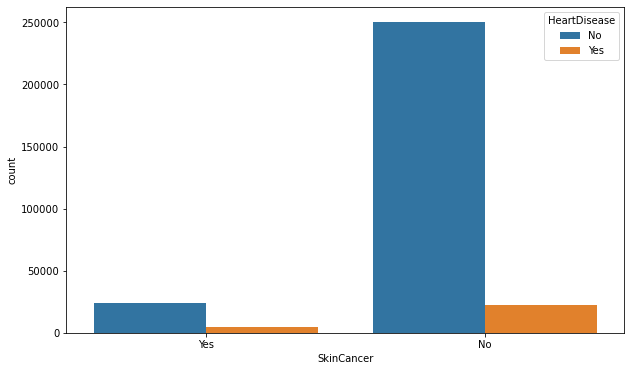

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x='SkinCancer',hue='HeartDisease',data=data,order=['Yes','No'])
plt.show()

## 7. Distribution of input variables

In [53]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

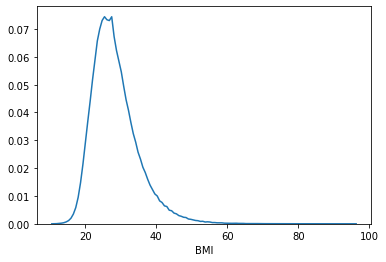

In [54]:
sns.distplot(a=data['BMI'],hist=False)
plt.show()

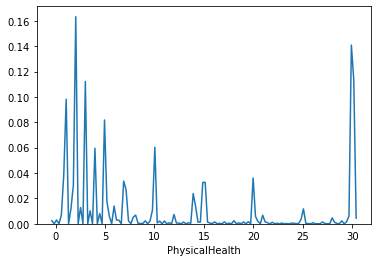

In [55]:
sns.distplot(a=data['PhysicalHealth'],hist=False)
plt.show()

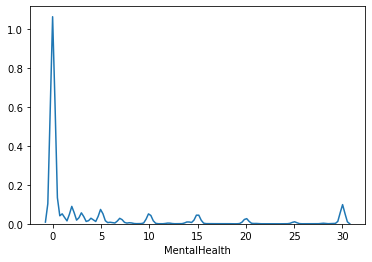

In [56]:
sns.distplot(a=data['MentalHealth'],hist=False)
plt.show()

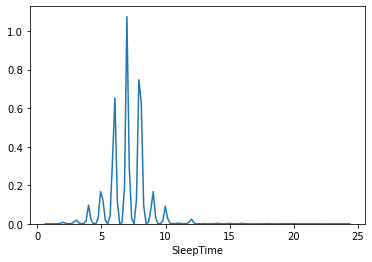

In [57]:
sns.distplot(a=data['SleepTime'],hist=False)
plt.show()

## 8. Finding Outliers

In [58]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


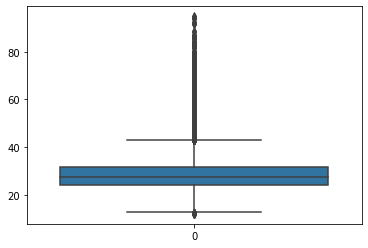

In [59]:
sns.boxplot(data=data['BMI'])
plt.show()

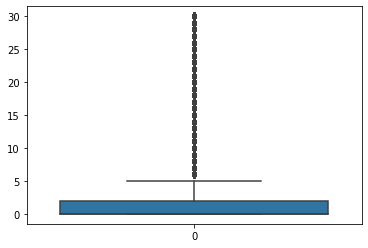

In [60]:
sns.boxplot(data=data['PhysicalHealth'])
plt.show()

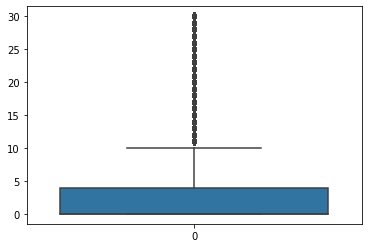

In [61]:
sns.boxplot(data=data['MentalHealth'])
plt.show()

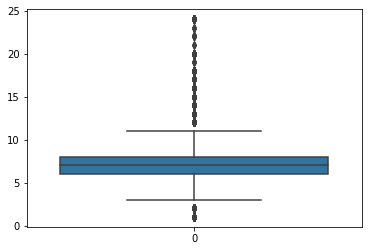

In [62]:
sns.boxplot(data=data['SleepTime'])
plt.show()

In [63]:
def finding_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR)))]
    return outliers


In [64]:
outliers = finding_outliers(data)
outliers

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,20.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN


In [65]:
def drop_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    not_outliers = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR)))]
    outliers_droped = not_outliers.dropna().reset_index()
    return outliers_droped
    

In [66]:
without_outlier_data = drop_outliers(data)
without_outlier_data

,index,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
1,3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
2,7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
3,8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
4,9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222526,319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No
222527,319788,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
222528,319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
222529,319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No


In [67]:
del without_outlier_data['index']

In [68]:
without_outlier_data.to_csv('Heart_Disease_data_without_outliers.csv')

In [69]:
301717 -222531

79186

If we drop **outliers** then we will miss 79186 observations that means we are droping 25% of our data so we cant drop those many observations also if we drop outliers we will miss the major information about person **BMI** so we will work with data with outliers.

## 8. Cheaking for imbalence 

In [70]:
data.shape

(301717, 18)

In [71]:
pd.value_counts(data['HeartDisease'])

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

In [72]:
le = LabelEncoder()
data['HeartDisease'] = le.fit_transform(data['HeartDisease'])

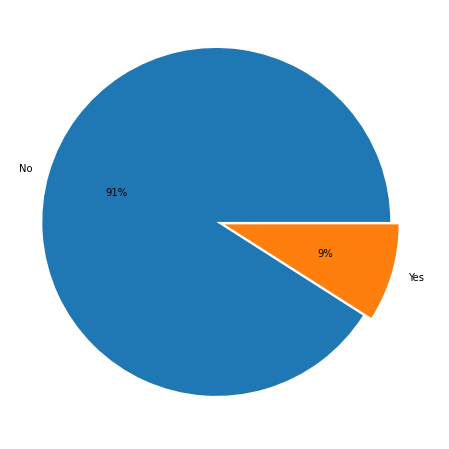

In [73]:
plt.figure(figsize=(10,8))
plt.pie(x=data['HeartDisease'].value_counts(),explode=(0.05,0),autopct='%1.0f%%',labels=['No','Yes'])
plt.show()

Here we have 274456 observations who dont have Heart disease and only 27261 observations have Heart disease so ita a highly imbalenced data with a proportion of 10:1

##### Using over_sampling

In [74]:
class_count_yes,class_count_no = data['HeartDisease'].value_counts()
class_yes  = data[data['HeartDisease']==1]
class_no   = data[data['HeartDisease']==0]
print('Class Yes :',class_yes.shape)
print('Class No  :',class_no.shape)

Class Yes : (27261, 18)
Class No  : (274456, 18)


In [75]:
class_yes_over = class_yes.sample(n=274456,random_state=15,replace=True)
final_data = pd.concat([class_yes_over,class_no],axis=0)

In [76]:
final_data.shape

(548912, 18)

In [77]:
final_data.value_counts(final_data['HeartDisease'])

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [78]:
final_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
89800,1,35.31,No,No,No,14.0,0.0,No,Male,70-74,White,No,Yes,Very good,9.0,No,No,Yes
235744,1,24.33,Yes,No,No,0.0,0.0,No,Male,75-79,White,Yes,Yes,Very good,10.0,No,No,No
94264,1,30.79,Yes,No,No,4.0,30.0,Yes,Male,55-59,White,No,Yes,Good,6.0,No,No,No
31764,1,34.44,Yes,No,No,0.0,0.0,No,Male,60-64,White,Yes,Yes,Good,8.0,No,No,No
189719,1,29.65,Yes,No,No,0.0,0.0,No,Male,55-59,White,"No, borderline diabetes",Yes,Good,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [79]:
final_data.to_csv('cleaned_heart_disease.csv')

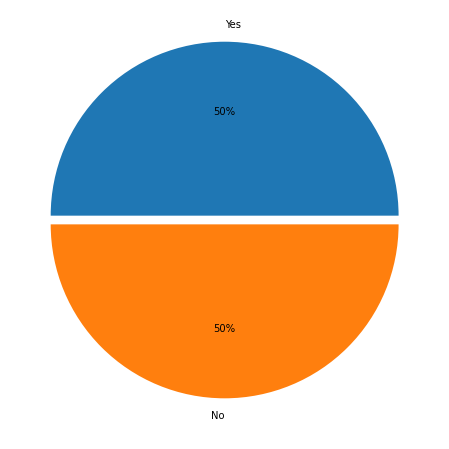

In [80]:
plt.figure(figsize=(10,8))
plt.pie(x=final_data['HeartDisease'].value_counts(),explode=(0.05,0),autopct='%1.0f%%',labels=['Yes','No'])
plt.show()

# 9. Corelation between the features and Feature importance

### Encoding the object features

In [81]:
non_numeric_data = final_data.select_dtypes('object')
non_numeric_data = non_numeric_data.columns.values
for col in non_numeric_data:
    final_data[col] = LabelEncoder().fit_transform(final_data[col])

In [82]:
final_data.dtypes

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime           float64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object

### Seperating Input and Output features

In [83]:
X = final_data.drop(columns='HeartDisease')
y = final_data[['HeartDisease']]

In [84]:
X.shape,y.shape

((548912, 17), (548912, 1))

### Scaling Input features

In [85]:
X_scaled = StandardScaler()
X_scaled = X_scaled.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled,columns=X.columns)
X_scaled

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.983221,-0.992399,-0.248702,-0.323841,0.849362,-0.505848,-0.571342,0.952712,0.668713,0.470376,-0.571457,0.644088,1.316353,1.172006,-0.434731,-0.291385,2.524910
1,-0.696216,1.007659,-0.248702,-0.323841,-0.547890,-0.505848,-0.571342,0.952712,0.963659,0.470376,1.763659,0.644088,1.316353,1.790479,-0.434731,-0.291385,-0.396054
2,0.291868,1.007659,-0.248702,-0.323841,-0.148675,2.972204,1.750265,0.952712,-0.216125,0.470376,-0.571457,0.644088,-0.143434,-0.683415,-0.434731,-0.291385,-0.396054
3,0.850151,1.007659,-0.248702,-0.323841,-0.547890,-0.505848,-0.571342,0.952712,0.078821,0.470376,1.763659,0.644088,-0.143434,0.553532,-0.434731,-0.291385,-0.396054
4,0.117501,1.007659,-0.248702,-0.323841,-0.547890,-0.505848,-0.571342,0.952712,-0.216125,0.470376,0.596101,0.644088,-0.143434,-0.064941,-0.434731,-0.291385,-0.396054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548907,-1.018949,-0.992399,-0.248702,-0.323841,-0.547890,-0.505848,-0.571342,-1.049635,-2.280745,-1.213574,-0.571457,0.644088,-1.603222,0.553532,-0.434731,-0.291385,-0.396054
548908,0.146562,1.007659,-0.248702,-0.323841,-0.547890,-0.505848,-0.571342,0.952712,-1.395908,-1.213574,-0.571457,0.644088,1.316353,-1.301888,2.300273,-0.291385,-0.396054
548909,-0.709982,-0.992399,-0.248702,-0.323841,-0.547890,-0.505848,-0.571342,-1.049635,-0.806016,-1.213574,-0.571457,0.644088,-0.143434,-0.683415,-0.434731,-0.291385,-0.396054
548910,0.600836,-0.992399,-0.248702,-0.323841,-0.547890,-0.505848,-0.571342,-1.049635,-1.985799,-1.213574,-0.571457,-1.552583,-0.143434,3.027426,-0.434731,-0.291385,-0.396054


### Check Corelation between input features

In [86]:
corr_matrix = X_scaled.corr()
corr_matrix

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
BMI,1.000000,0.010807,-0.036629,0.018309,0.115981,0.064485,0.193465,0.024533,-0.032044,-0.033015,0.226998,-0.154230,-0.002648,-0.045275,0.104138,0.069324,-0.039570
Smoking,0.010807,1.000000,0.086496,0.072360,0.125047,0.079003,0.129124,0.111410,0.128528,0.069721,0.068269,-0.101718,-0.004715,-0.019026,0.028789,0.032843,0.028666
AlcoholDrinking,-0.036629,0.086496,1.000000,-0.026801,-0.028720,0.042001,-0.048030,0.001435,-0.086096,0.031269,-0.072421,0.020454,0.004909,-0.001416,-0.008835,-0.039829,-0.013049
Stroke,0.018309,0.072360,-0.026801,1.000000,0.168972,0.071709,0.202147,0.000573,0.143093,-0.022078,0.122976,-0.102348,-0.027255,0.010088,0.057889,0.108779,0.046323
PhysicalHealth,0.115981,0.125047,-0.028720,0.168972,1.000000,0.316311,0.450294,-0.041839,0.116187,0.002898,0.176989,-0.267673,-0.035747,-0.070309,0.134828,0.175077,0.037976
MentalHealth,0.064485,0.079003,0.042001,0.071709,0.316311,1.000000,0.183654,-0.112307,-0.150686,-0.029838,0.045294,-0.116217,-0.013204,-0.120818,0.118905,0.054292,-0.035767
DiffWalking,0.193465,0.129124,-0.048030,0.202147,0.450294,0.183654,1.000000,-0.077985,0.246551,-0.015057,0.229825,-0.318583,-0.060724,-0.032492,0.132067,0.185334,0.062582
Sex,0.024533,0.111410,0.001435,0.000573,-0.041839,-0.112307,-0.077985,1.000000,0.008104,0.049830,0.018332,0.062998,0.002510,0.006975,-0.088751,-0.010725,0.058787
AgeCategory,-0.032044,0.128528,-0.086096,0.143093,0.116187,-0.150686,0.246551,0.008104,1.000000,0.179710,0.196317,-0.135919,0.025250,0.118753,-0.055354,0.138683,0.264601
Race,-0.033015,0.069721,0.031269,-0.022078,0.002898,-0.029838,-0.015057,0.049830,0.179710,1.000000,-0.040713,0.034977,0.050652,0.039882,-0.033537,0.007298,0.151490


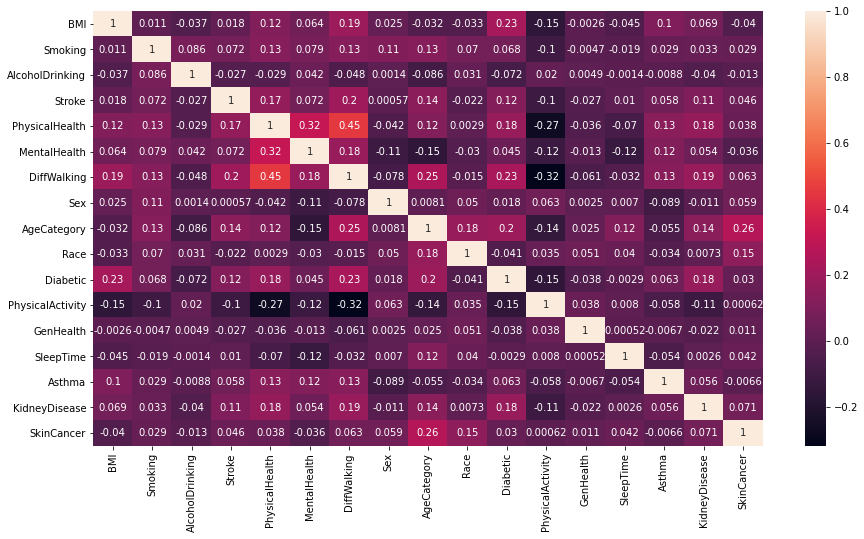

In [87]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

There is no multicoliniarity between the input features

### Dividing the data set for training and testing

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=12,stratify=y)

In [89]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((411684, 17), (137228, 17), (411684, 1), (137228, 1))

### Checking for feature importance using DecisionTreeClassifier

In [90]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
imp_features = dt_model.feature_importances_
imp_features = pd.DataFrame(data={'Features':X_scaled.columns,'DT IMP Features':imp_features})
imp_features

,Features,DT IMP Features
0,BMI,0.293359
1,Smoking,0.017251
2,AlcoholDrinking,0.009499
3,Stroke,0.024411
4,PhysicalHealth,0.056458
5,MentalHealth,0.053647
6,DiffWalking,0.034264
7,Sex,0.024321
8,AgeCategory,0.212129
9,Race,0.029566


In [92]:
imp_features = imp_features.sort_values(by='DT IMP Features',ascending=False)
imp_features

,Features,DT IMP Features
0,BMI,0.293359
8,AgeCategory,0.212129
13,SleepTime,0.081647
12,GenHealth,0.077234
4,PhysicalHealth,0.056458
5,MentalHealth,0.053647
6,DiffWalking,0.034264
9,Race,0.029566
3,Stroke,0.024411
7,Sex,0.024321


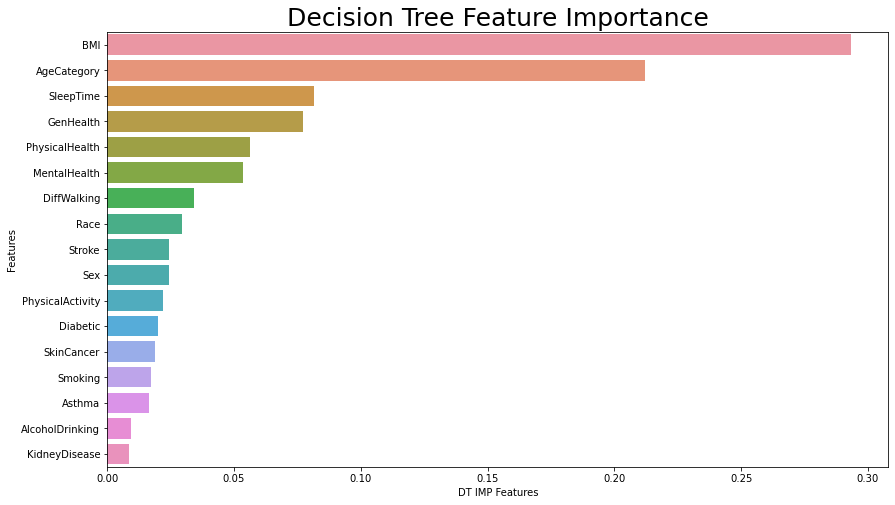

In [93]:
plt.figure(figsize=(14,8))
sns.barplot(x='DT IMP Features',y='Features',data=imp_features)
plt.title('Decision Tree Feature Importance',size=25)
plt.show()

# Model Selection

### Checking for best params using grid_search_cv by using DecisionTreeClassifier

In [94]:
grid_search = GridSearchCV(estimator=dt_model,param_grid={'criterion':['gini','entropy'],
                                                          'max_depth':[1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 59 , 60 ]})

In [95]:
%%time
grid_search= grid_search.fit(X_scaled,y)

Wall time: 24min 35s


In [96]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 59}

### These are the models we are testing for our prediction

##### 1. LogisticRegression
##### 2.DecisionTreeClassifier
##### 3.RandomForestClassifier
##### 4.AdaBoostClassifier
##### 5.GradientBoostingClassifier
##### 6.XGBClassifier
##### 7.LGBMClassifier
##### 8.KNeighborsClassifier
##### 9.GaussianNB

### 1. LogisticRegression

In [97]:
%%time
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

Wall time: 7.89 s


LogisticRegression()

In [98]:
logistic_pred_train = logistic_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,logistic_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,logistic_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,logistic_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,logistic_pred_train))
print('Classification Report          :\n',classification_report(y_train,logistic_pred_train))

Accuracy Score                 : 0.7483
Precision Score                : 0.7399
Recall Score                   : 0.766
Confusion Matrix               :
 [[150414  55428]
 [ 48177 157665]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.76      0.73      0.74    205842
           1       0.74      0.77      0.75    205842

    accuracy                           0.75    411684
   macro avg       0.75      0.75      0.75    411684
weighted avg       0.75      0.75      0.75    411684



In [99]:
logistic_pred_test = logistic_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,logistic_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,logistic_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,logistic_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,logistic_pred_test))
print('Classification Report          :\n',classification_report(y_test,logistic_pred_test))

Accuracy Score                 : 0.7472
Precision Score                : 0.7383
Recall Score                   : 0.7659
Confusion Matrix               :
 [[49987 18627]
 [16063 52551]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.76      0.73      0.74     68614
           1       0.74      0.77      0.75     68614

    accuracy                           0.75    137228
   macro avg       0.75      0.75      0.75    137228
weighted avg       0.75      0.75      0.75    137228



Area Under Curve     : 0.7472090243973533


Text(0, 0.5, 'True Positive Rate')

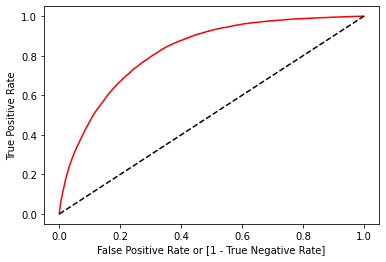

In [100]:
fpr, tpr, thresholds = roc_curve(y_test,logistic_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, logistic_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### 2.DecisionTreeClassifier

In [101]:
%%time
dt_model = DecisionTreeClassifier(random_state=15,max_depth=57)
dt_model.fit(X_train,y_train)

Wall time: 2.89 s


DecisionTreeClassifier(max_depth=57, random_state=15)

In [102]:
dt_pred_train = dt_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,dt_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,dt_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,dt_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,dt_pred_train))
print('Classification Report          :\n',classification_report(y_train,dt_pred_train))

Accuracy Score                 : 0.9979
Precision Score                : 0.9958
Recall Score                   : 1.0
Confusion Matrix               :
 [[204975    867]
 [     5 205837]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    205842
           1       1.00      1.00      1.00    205842

    accuracy                           1.00    411684
   macro avg       1.00      1.00      1.00    411684
weighted avg       1.00      1.00      1.00    411684



In [103]:
dt_pred_test = dt_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,dt_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,dt_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,dt_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,dt_pred_test))
print('Classification Report          :\n',classification_report(y_test,dt_pred_test))

Accuracy Score                 : 0.9501
Precision Score                : 0.9099
Recall Score                   : 0.999
Confusion Matrix               :
 [[61827  6787]
 [   66 68548]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     68614
           1       0.91      1.00      0.95     68614

    accuracy                           0.95    137228
   macro avg       0.95      0.95      0.95    137228
weighted avg       0.95      0.95      0.95    137228



Area Under Curve     : 0.9500612119975516


Text(0, 0.5, 'True Positive Rate')

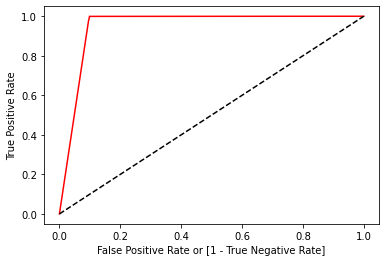

In [104]:
fpr, tpr, thresholds = roc_curve(y_test,dt_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, dt_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### 3. RandomForestClassifier

In [105]:
%%time
rf_model = RandomForestClassifier(random_state=15,max_depth=57)
rf_model.fit(X_train,y_train)

Wall time: 1min 3s


RandomForestClassifier(max_depth=57, random_state=15)

In [106]:
rf_pred_train = rf_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,rf_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,rf_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,rf_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,rf_pred_train))
print('Classification Report          :\n',classification_report(y_train,rf_pred_train))

Accuracy Score                 : 0.9979
Precision Score                : 0.9958
Recall Score                   : 1.0
Confusion Matrix               :
 [[204981    861]
 [     3 205839]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    205842
           1       1.00      1.00      1.00    205842

    accuracy                           1.00    411684
   macro avg       1.00      1.00      1.00    411684
weighted avg       1.00      1.00      1.00    411684



In [107]:
rf_pred_test = rf_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,rf_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,rf_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,rf_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,rf_pred_test))
print('Classification Report          :\n',classification_report(y_test,rf_pred_test))

Accuracy Score                 : 0.9656
Precision Score                : 0.9363
Recall Score                   : 0.9991
Confusion Matrix               :
 [[63948  4666]
 [   61 68553]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     68614
           1       0.94      1.00      0.97     68614

    accuracy                           0.97    137228
   macro avg       0.97      0.97      0.97    137228
weighted avg       0.97      0.97      0.97    137228



Area Under Curve     : 0.9655536770921387


Text(0, 0.5, 'True Positive Rate')

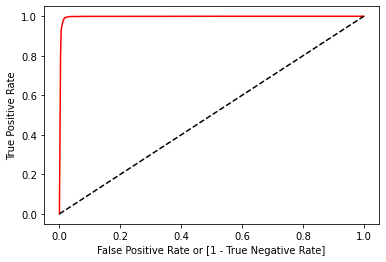

In [108]:
fpr, tpr, thresholds = roc_curve(y_test,rf_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, rf_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### 4. AdaBoostClassifier

In [109]:
%%time
adaboost_model = AdaBoostClassifier(random_state=15)
adaboost_model.fit(X_train,y_train)

Wall time: 18.1 s


AdaBoostClassifier(random_state=15)

In [110]:
adaboost_pred_train = adaboost_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,adaboost_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,adaboost_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,adaboost_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,adaboost_pred_train))
print('Classification Report          :\n',classification_report(y_train,adaboost_pred_train))

Accuracy Score                 : 0.7587
Precision Score                : 0.7504
Recall Score                   : 0.7753
Confusion Matrix               :
 [[152762  53080]
 [ 46252 159590]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.77      0.74      0.75    205842
           1       0.75      0.78      0.76    205842

    accuracy                           0.76    411684
   macro avg       0.76      0.76      0.76    411684
weighted avg       0.76      0.76      0.76    411684



In [111]:
adaboost_pred_test = adaboost_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,adaboost_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,adaboost_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,adaboost_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,adaboost_pred_test))
print('Classification Report          :\n',classification_report(y_test,adaboost_pred_test))

Accuracy Score                 : 0.7565
Precision Score                : 0.748
Recall Score                   : 0.7738
Confusion Matrix               :
 [[50723 17891]
 [15519 53095]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.77      0.74      0.75     68614
           1       0.75      0.77      0.76     68614

    accuracy                           0.76    137228
   macro avg       0.76      0.76      0.76    137228
weighted avg       0.76      0.76      0.76    137228



Area Under Curve     : 0.7565365668813944


Text(0, 0.5, 'True Positive Rate')

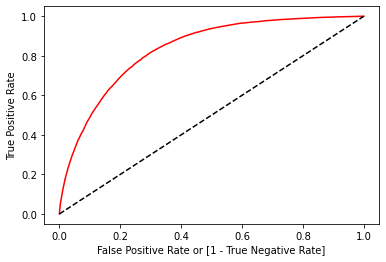

In [112]:
fpr, tpr, thresholds = roc_curve(y_test,adaboost_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, adaboost_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### 5. GradientBoostingClassifier

In [113]:
%%time
gradient_model = GradientBoostingClassifier(random_state=15)
gradient_model.fit(X_train,y_train)

Wall time: 1min 6s


GradientBoostingClassifier(random_state=15)

In [114]:
gradient_pred_train = gradient_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,gradient_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,gradient_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,gradient_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,gradient_pred_train))
print('Classification Report          :\n',classification_report(y_train,gradient_pred_train))

Accuracy Score                 : 0.7631
Precision Score                : 0.7447
Recall Score                   : 0.8008
Confusion Matrix               :
 [[149326  56516]
 [ 40994 164848]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.78      0.73      0.75    205842
           1       0.74      0.80      0.77    205842

    accuracy                           0.76    411684
   macro avg       0.76      0.76      0.76    411684
weighted avg       0.76      0.76      0.76    411684



In [115]:
gradient_pred_test = gradient_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,gradient_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,gradient_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,gradient_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,gradient_pred_test))
print('Classification Report          :\n',classification_report(y_test,gradient_pred_test))

Accuracy Score                 : 0.7611
Precision Score                : 0.7422
Recall Score                   : 0.8002
Confusion Matrix               :
 [[49547 19067]
 [13711 54903]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.78      0.72      0.75     68614
           1       0.74      0.80      0.77     68614

    accuracy                           0.76    137228
   macro avg       0.76      0.76      0.76    137228
weighted avg       0.76      0.76      0.76    137228



Area Under Curve     : 0.7611420409828897


Text(0, 0.5, 'True Positive Rate')

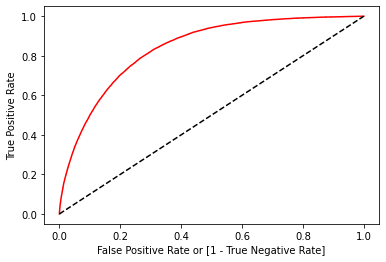

In [116]:
fpr, tpr, thresholds = roc_curve(y_test,gradient_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, gradient_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### 6. XGBClassifier

In [117]:
%%time
xgb_model = XGBClassifier(max_depth=57,random_state=15)
xgb_model.fit(X_train,y_train)

Wall time: 2min 37s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=57, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=15,
              reg_alpha=0, reg_lambda=1, ...)

In [118]:
xgb_pred_train = xgb_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,xgb_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,xgb_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,xgb_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,xgb_pred_train))
print('Classification Report          :\n',classification_report(y_train,xgb_pred_train))

Accuracy Score                 : 0.9979
Precision Score                : 0.9958
Recall Score                   : 1.0
Confusion Matrix               :
 [[204979    863]
 [     4 205838]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    205842
           1       1.00      1.00      1.00    205842

    accuracy                           1.00    411684
   macro avg       1.00      1.00      1.00    411684
weighted avg       1.00      1.00      1.00    411684



In [119]:
xgb_pred_test = xgb_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,xgb_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,xgb_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,xgb_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,xgb_pred_test))
print('Classification Report          :\n',classification_report(y_test,xgb_pred_test))

Accuracy Score                 : 0.9635
Precision Score                : 0.9326
Recall Score                   : 0.9991
Confusion Matrix               :
 [[63662  4952]
 [   63 68551]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     68614
           1       0.93      1.00      0.96     68614

    accuracy                           0.96    137228
   macro avg       0.97      0.96      0.96    137228
weighted avg       0.97      0.96      0.96    137228



Area Under Curve     : 0.9634549800332294


Text(0, 0.5, 'True Positive Rate')

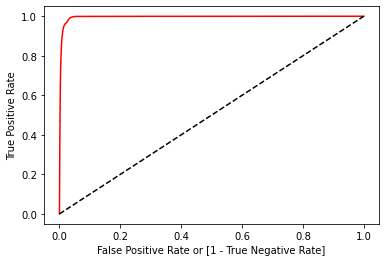

In [120]:
fpr, tpr, thresholds = roc_curve(y_test,xgb_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, xgb_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### 7. LGBMClassifier

In [121]:
%%time
lgb_model      = LGBMClassifier(max_depth=57,random_state=15)
lgb_model.fit(X_train,y_train)

Wall time: 6.4 s


LGBMClassifier(max_depth=57, random_state=15)

In [122]:
lgb_pred_train = lgb_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,lgb_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,lgb_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,lgb_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,lgb_pred_train))
print('Classification Report          :\n',classification_report(y_train,lgb_pred_train))

Accuracy Score                 : 0.7695
Precision Score                : 0.7428
Recall Score                   : 0.8247
Confusion Matrix               :
 [[147050  58792]
 [ 36081 169761]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.80      0.71      0.76    205842
           1       0.74      0.82      0.78    205842

    accuracy                           0.77    411684
   macro avg       0.77      0.77      0.77    411684
weighted avg       0.77      0.77      0.77    411684



In [123]:
lgb_pred_test = lgb_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,lgb_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,lgb_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,lgb_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,lgb_pred_test))
print('Classification Report          :\n',classification_report(y_test,lgb_pred_test))

Accuracy Score                 : 0.7668
Precision Score                : 0.7399
Recall Score                   : 0.823
Confusion Matrix               :
 [[48765 19849]
 [12147 56467]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.80      0.71      0.75     68614
           1       0.74      0.82      0.78     68614

    accuracy                           0.77    137228
   macro avg       0.77      0.77      0.77    137228
weighted avg       0.77      0.77      0.77    137228



Area Under Curve     : 0.7668405864692337


Text(0, 0.5, 'True Positive Rate')

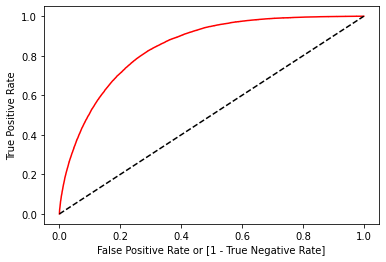

In [124]:
fpr, tpr, thresholds = roc_curve(y_test,lgb_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, lgb_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### 8. KNeighborsClassifier

In [125]:
%%time
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

Wall time: 2min 6s


KNeighborsClassifier()

In [126]:
knn_pred_train = knn_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,knn_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,knn_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,knn_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,knn_pred_train))
print('Classification Report          :\n',classification_report(y_train,knn_pred_train))

Accuracy Score                 : 0.9157
Precision Score                : 0.8569
Recall Score                   : 0.9981
Confusion Matrix               :
 [[171546  34296]
 [   396 205446]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      0.83      0.91    205842
           1       0.86      1.00      0.92    205842

    accuracy                           0.92    411684
   macro avg       0.93      0.92      0.92    411684
weighted avg       0.93      0.92      0.92    411684



In [127]:
knn_pred_test = knn_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,knn_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,knn_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,knn_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,knn_pred_test))
print('Classification Report          :\n',classification_report(y_test,knn_pred_test))

Accuracy Score                 : 0.8832
Precision Score                : 0.8146
Recall Score                   : 0.9922
Confusion Matrix               :
 [[53123 15491]
 [  534 68080]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.99      0.77      0.87     68614
           1       0.81      0.99      0.89     68614

    accuracy                           0.88    137228
   macro avg       0.90      0.88      0.88    137228
weighted avg       0.90      0.88      0.88    137228



Area Under Curve     : 0.8832235403853441


Text(0, 0.5, 'True Positive Rate')

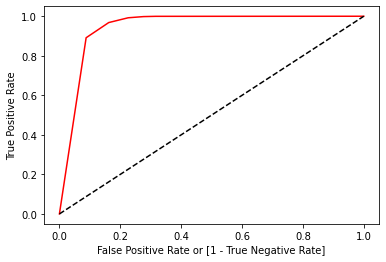

In [128]:
fpr, tpr, thresholds = roc_curve(y_test,knn_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, knn_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### 9. GaussianNB

In [129]:
%%time
gauss_nb_model = GaussianNB()
gauss_nb_model.fit(X_train,y_train)

Wall time: 334 ms


GaussianNB()

In [130]:
gauss_nb_pred_train = gauss_nb_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,gauss_nb_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,gauss_nb_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,gauss_nb_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,gauss_nb_pred_train))
print('Classification Report          :\n',classification_report(y_train,gauss_nb_pred_train))

Accuracy Score                 : 0.7027
Precision Score                : 0.7559
Recall Score                   : 0.5987
Confusion Matrix               :
 [[166048  39794]
 [ 82600 123242]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.67      0.81      0.73    205842
           1       0.76      0.60      0.67    205842

    accuracy                           0.70    411684
   macro avg       0.71      0.70      0.70    411684
weighted avg       0.71      0.70      0.70    411684



In [131]:
gauss_nb_pred_test = gauss_nb_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,gauss_nb_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,gauss_nb_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,gauss_nb_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,gauss_nb_pred_test))
print('Classification Report          :\n',classification_report(y_test,gauss_nb_pred_test))

Accuracy Score                 : 0.7031
Precision Score                : 0.7557
Recall Score                   : 0.6002
Confusion Matrix               :
 [[55304 13310]
 [27435 41179]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.67      0.81      0.73     68614
           1       0.76      0.60      0.67     68614

    accuracy                           0.70    137228
   macro avg       0.71      0.70      0.70    137228
weighted avg       0.71      0.70      0.70    137228



Area Under Curve     : 0.7030853761622993


Text(0, 0.5, 'True Positive Rate')

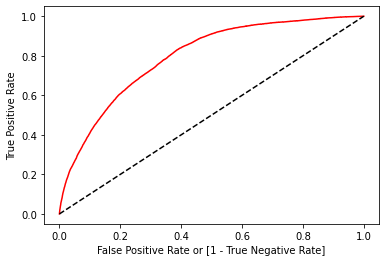

In [132]:
fpr, tpr, thresholds = roc_curve(y_test,gauss_nb_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, gauss_nb_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Results Comparison

In [133]:
result_df = pd.DataFrame({'Models':['Logistic Regression','Decision Tree','Random Forest','Addaboost','Gradient Boosting','Extreme Gradient Boosting','Light Gradient Boosting','K-Nearest Neighbor','GaussianNB'],
                          'Training Accuracy':[0.7483,0.9979,0.9979,0.7587,0.7631,0.9979,0.7695,0.9156,0.7027],
                          'Test Accuracy':[0.7472,0.9500,0.9656,0.7565,0.7611,0.9634,0.7668,0.8832,0.7031],
                          'Precision Score':[0.7383,0.9098,0.9363,0.7480,0.7422,0.9326,0.7399,0.8146,0.7557],
                          'Recall Score':[0.7659,0.9990,0.9991,0.7738,0.8002,0.9991,0.8230,0.9932,0.6002],
                          'AUC Score':[0.7472,0.9500,0.9655,0.7565,0.7611,0.9634,0.7668,0.8832,0.7030]})
result_df

,Models,Training Accuracy,Test Accuracy,Precision Score,Recall Score,AUC Score
0,Logistic Regression,0.7483,0.7472,0.7383,0.7659,0.7472
1,Decision Tree,0.9979,0.9500,0.9098,0.9990,0.9500
2,Random Forest,0.9979,0.9656,0.9363,0.9991,0.9655
3,Addaboost,0.7587,0.7565,0.7480,0.7738,0.7565
4,Gradient Boosting,0.7631,0.7611,0.7422,0.8002,0.7611
5,Extreme Gradient Boosting,0.9979,0.9634,0.9326,0.9991,0.9634
6,Light Gradient Boosting,0.7695,0.7668,0.7399,0.8230,0.7668
7,K-Nearest Neighbor,0.9156,0.8832,0.8146,0.9932,0.8832
8,GaussianNB,0.7027,0.7031,0.7557,0.6002,0.7030


In [134]:
result_df = result_df.sort_values(by='Test Accuracy',ascending=False)
result_df

,Models,Training Accuracy,Test Accuracy,Precision Score,Recall Score,AUC Score
2,Random Forest,0.9979,0.9656,0.9363,0.9991,0.9655
5,Extreme Gradient Boosting,0.9979,0.9634,0.9326,0.9991,0.9634
1,Decision Tree,0.9979,0.9500,0.9098,0.9990,0.9500
7,K-Nearest Neighbor,0.9156,0.8832,0.8146,0.9932,0.8832
6,Light Gradient Boosting,0.7695,0.7668,0.7399,0.8230,0.7668
4,Gradient Boosting,0.7631,0.7611,0.7422,0.8002,0.7611
3,Addaboost,0.7587,0.7565,0.7480,0.7738,0.7565
0,Logistic Regression,0.7483,0.7472,0.7383,0.7659,0.7472
8,GaussianNB,0.7027,0.7031,0.7557,0.6002,0.7030


From above dataframe its clear that for random forest we got better accuracy as well as precision and recall score.

# Conclusion
**Input Features                =** 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke','PhysicalHealth', 'MentalHealth',                                             'DiffWalking', 'Sex', 'AgeCategory','Race', 'Diabetic', 'PhysicalActivity',                                                 'GenHealth', 'SleepTime','Asthma', 'KidneyDisease', 'SkinCancer'

**Output Feature                =** HeartDisease

**Data Set Type                 =**  Balenced data set using Oversampling

**Best Model                    =** Random Forest

**Train Accuracy Score         :** 0.9979	

**Test Accuracy Score          :** 0.9656

**Classification Report          :**

               precision    recall  f1-score   support
             
           0       1.00      0.93      0.96     68614
           1       0.94      1.00      0.97     68614


### Dumping the best Model

In [135]:
from pickle import dump
dump(rf_model,open('rf_model.pkl','wb'))